<a href="https://colab.research.google.com/github/euviniciusmendonca/estudo_python/blob/main/C%C3%B3pia_de_Exerc%C3%ADcio_Estat%C3%ADstica_Inferencial_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import e Conhecendo os dados

In [ ]:
# Importação das bibliotecas
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
# Upload dos dados
df = pd.read_csv("Walmart 2.csv")

In [ ]:
# Preview da qualidade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB




Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**


In [ ]:
store20 = df.loc[df["Store"]==20]
store20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 2717 to 2859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


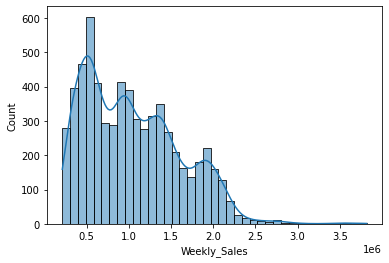

In [ ]:
sns.histplot(x = "Weekly_Sales", kde =True, data = df)

,Store,Weekly_Sales
0,20,2107676.87
1,4,2094712.96
2,14,2020978.40
3,13,2003620.31
4,2,1925751.34
5,10,1899424.57
6,27,1775216.20
7,6,1564728.19
8,1,1555264.40
9,39,1450668.13


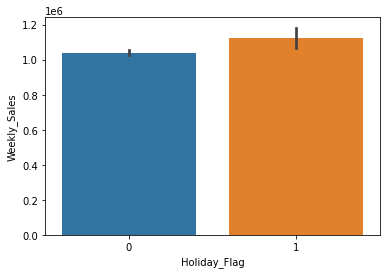

In [ ]:
pd.set_option("float_format" ,"{:.2f}".format)
Vendassemanais = df.groupby("Store").agg({"Weekly_Sales" : "mean"})
Vendassemanais.sort_values("Weekly_Sales", ascending=False).reset_index()

sns.barplot(data = df, x = "Holiday_Flag", y ="Weekly_Sales"  )

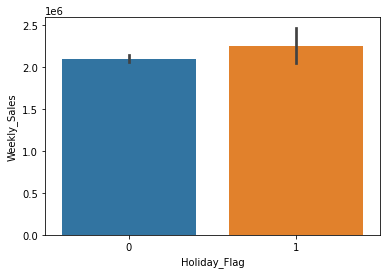

In [ ]:
sns.barplot(data = store20, x = "Holiday_Flag", y ="Weekly_Sales" )


Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




In [ ]:
sample_simp25 = store20.sample(25, random_state = 0)
# sample_simp.head()
sample_simp50 = store20.sample(50, random_state = 0)
sample_simp50.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2762,20,17-12-2010,2819193.17,0,24.07,3.14,204.63,7.48
2835,20,11-05-2012,2168097.11,0,63.19,3.89,214.53,7.14
2733,20,28-05-2010,2065984.95,0,70.97,2.90,204.14,7.86
2773,20,04-03-2011,2143424.61,0,37.33,3.43,206.92,7.34
2739,20,09-07-2010,2107285.85,0,78.09,2.79,204.36,7.53


In [ ]:
r_store20 = store20.mean()
r_store20
amostrasistematica = store20["Unemployment"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Store               20.00
Weekly_Sales   2107676.87
Holiday_Flag         0.07
Temperature         55.45
Fuel_Price           3.42
CPI                209.04
Unemployment         7.37
dtype: float64

#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [ ]:
# Todos os dados possíveis
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,media_WS_store
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,1555264.40
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,1555264.40
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,1555264.40
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11,1555264.40
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11,1555264.40


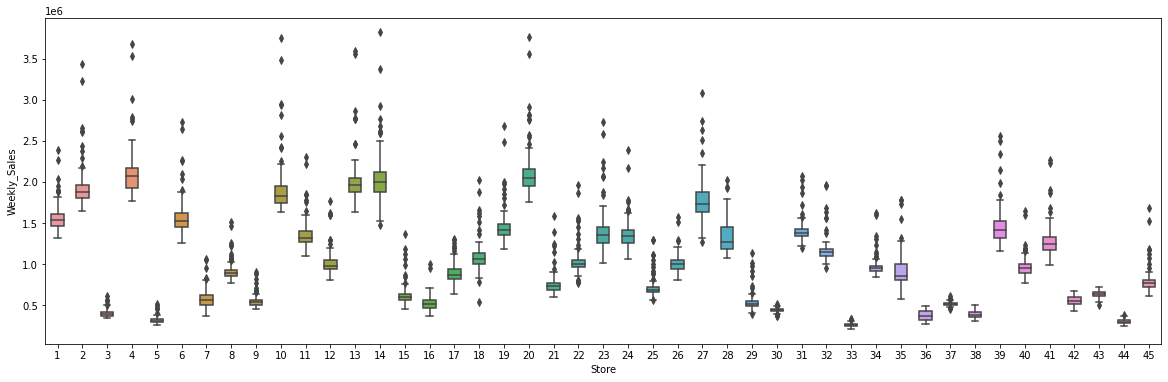

In [ ]:
# Boxplot das vendas semanais por loja
ax = sns.boxplot(y= 'Weekly_Sales', x= 'Store', data = df, orient = 'v', width = 0.5)
ax.figure.set_size_inches(20,6) 

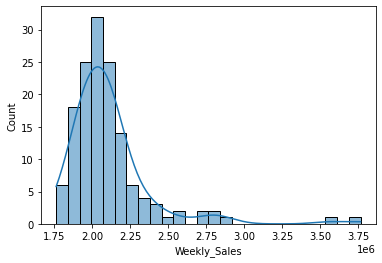

In [ ]:
# Distribuição das vendas semanais da loja 20
sns.histplot(x = "Weekly_Sales", kde =True, data = store20)

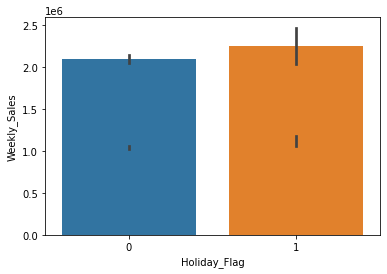

In [ ]:
# Verificando se as vendas em período de feriado tem uma variação maior
sns.barplot(data = df, x = "Holiday_Flag", y ="Weekly_Sales"  )
sns.barplot(data = store20, x = "Holiday_Flag", y ="Weekly_Sales"  )

# Etapa 02

## Amostragem Simples 

In [ ]:
# Amostrando simples usando o random_state
sample_simp25 = store20.sample(25, random_state = 0)
# sample_simp.head()
sample_simp50 = store20.sample(50, random_state = 0)
sample_simp50.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2762,20,17-12-2010,2819193.17,0,24.07,3.14,204.63,7.48
2835,20,11-05-2012,2168097.11,0,63.19,3.89,214.53,7.14
2733,20,28-05-2010,2065984.95,0,70.97,2.90,204.14,7.86
2773,20,04-03-2011,2143424.61,0,37.33,3.43,206.92,7.34
2739,20,09-07-2010,2107285.85,0,78.09,2.79,204.36,7.53


In [ ]:
# Amostrando simples usando o seed
np.random.seed(10)
amostra25 = df.sample(25)
amostra50 = df.sample(50)
amostra50.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,media_WS_store
1986,14,13-07-2012,1544422.35,0,79.97,3.52,191.17,8.68,2020978.40
5276,37,20-07-2012,503744.56,0,81.76,3.31,220.61,6.62,518900.28
5377,38,30-09-2011,366819.84,0,83.26,3.88,129.61,13.50,385731.65
874,7,28-05-2010,442734.55,0,54.24,2.74,189.45,8.96,570617.31
2036,15,01-10-2010,566945.95,0,59.69,2.84,132.76,8.07,623312.47


In [ ]:
# Quantidade de classes distintas na amostra
# a25 = amostra25.groupby("Store")["Store","Weekly_Sales"].agg({"Weekly_Sales": "count"}).reset_index()
# a25 = amostra25.groupby('Store')['Weekly_Sales']
print(amostra25.value_counts("Store"))
print(amostra50.value_counts("Store"))

Store
7     3
45    2
5     2
22    2
19    1
35    1
34    1
29    1
27    1
23    1
20    1
2     1
3     1
17    1
15    1
14    1
13    1
12    1
9     1
18    1
dtype: int64
Store
38    4
20    3
7     3
33    3
36    3
23    3
6     2
43    2
26    2
19    2
13    2
37    1
41    1
22    1
30    1
29    1
28    1
24    1
2     1
21    1
3     1
18    1
17    1
16    1
15    1
14    1
12    1
11    1
8     1
5     1
4     1
44    1
dtype: int64


## Amostragem Sistemática 

In [ ]:
# Amostragem sistemática com passo e primeiro valor definidos
passo = 10
inicial = 0
final= 70
indices = np.arange(inicial,df.shape[0],passo)
amostra = df.loc[indices]
amostra

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,media_WS_store
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,1555264.40
10,1,16-04-2010,1466058.28,0,66.32,2.81,210.49,7.81,1555264.40
20,1,25-06-2010,1422711.60,0,84.34,2.65,211.34,7.81,1555264.40
30,1,03-09-2010,1540163.53,0,81.21,2.58,211.53,7.79,1555264.40
40,1,12-11-2010,1494479.49,0,59.61,2.73,212.00,7.84,1555264.40
...,...,...,...,...,...,...,...,...,...
6390,45,23-12-2011,1521957.99,0,42.27,3.39,188.93,8.52,785981.41
6400,45,02-03-2012,782796.01,0,41.55,3.82,190.17,8.42,785981.41
6410,45,11-05-2012,770487.37,0,61.24,3.89,190.98,8.57,785981.41
6420,45,20-07-2012,737613.65,0,78.89,3.57,191.17,8.68,785981.41


## Amostragem Estratificada 

In [ ]:
# Verificando quantos tipos diferentes de classe temos na amostra
df['Store'].value_counts() 

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:


# Amostragem estratificada usando train_test_split
from sklearn.model_selection import train_test_split

X_1, X_2 = train_test_split(df, test_size = 100 #Tamanho da amostra X_2 - Amostra alvo
                            , stratify = df['Store'])
X_2['Store'].value_counts() 

21    3
26    3
6     3
7     3
25    3
4     3
39    3
43    3
37    3
20    3
10    2
33    2
19    2
41    2
24    2
29    2
16    2
28    2
18    2
13    2
22    2
36    2
2     2
14    2
40    2
44    2
15    2
12    2
38    2
32    2
23    2
34    2
11    2
17    2
9     2
31    2
1     2
42    2
27    2
5     2
35    2
30    2
8     2
3     2
45    2
Name: Store, dtype: int64

In [ ]:
X_1['Store'].value_counts() 

9     141
38    141
16    141
41    141
19    141
17    141
45    141
31    141
5     141
42    141
33    141
23    141
28    141
30    141
29    141
32    141
15    141
13    141
44    141
12    141
3     141
1     141
27    141
14    141
24    141
10    141
2     141
11    141
34    141
8     141
35    141
22    141
40    141
36    141
18    141
21    140
39    140
6     140
7     140
25    140
26    140
43    140
37    140
4     140
20    140
Name: Store, dtype: int64

## Amostragem Clusterizada 

In [ ]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20
amostra = df[df.Store==20].sample(frac=0.1)
amostra 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,media_WS_store
2768,20,28-01-2011,1761506.68,0,23.21,3.24,205.39,7.34,2107676.87
2844,20,13-07-2012,2134680.12,0,78.27,3.52,214.73,7.28,2107676.87
2774,20,11-03-2011,1990932.77,0,39.53,3.58,207.19,7.34,2107676.87
2813,20,09-12-2011,2546123.78,0,41.64,3.42,211.87,7.08,2107676.87
2825,20,02-03-2012,2148822.76,0,39.98,3.82,213.67,6.96,2107676.87
2852,20,07-09-2012,2080529.06,1,76.36,3.91,215.22,7.28,2107676.87
2841,20,22-06-2012,2060588.69,0,76.51,3.56,214.61,7.14,2107676.87
2729,20,30-04-2010,1919053.21,0,54.75,2.92,203.65,7.86,2107676.87
2763,20,24-12-2010,3766687.43,0,25.17,3.14,204.64,7.48,2107676.87
2828,20,23-03-2012,1992436.96,0,66.11,3.90,214.09,6.96,2107676.87


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

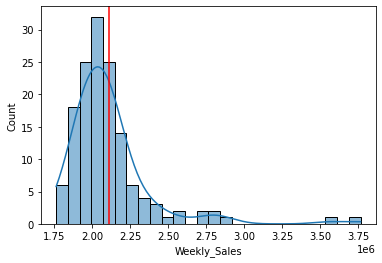

In [ ]:
# Filtrando o dataset e vendo seu histograma
store20 = df[df['Store'] == 20]
sns.histplot(data = store20, x = "Weekly_Sales", kde=True)
plt.axvline(store20["Weekly_Sales"].mean(), c= "red")

<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





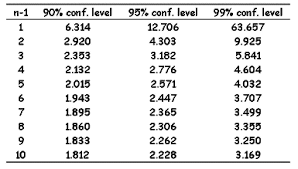

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T


In [ ]:
# Verificando a média da população


In [ ]:
# Visualizando a distribuição dos dados como ele são


In [ ]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central


In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal



In [ ]:
# Verificando a média da população
